/home/emilka/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
/home/emilka/anaconda3/lib/python3.7/site-packages/biosppy/storage.py:436: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  data = np.genfromtxt(values, dtype=dtype, delimiter=b'\t')


12


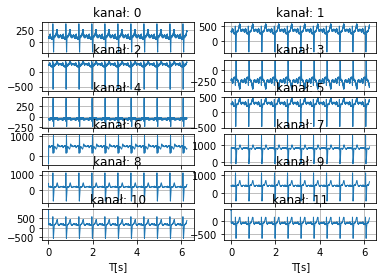

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from biosppy import storage
from biosppy.signals import ecg
from math import ceil

def import_from_txt(path_to_file, fs):
    signal, mdata = storage.load_txt(f"{path_to_file}")
    samples = [[] for i in range(0,12)]
    for sig in signal:
        splited = sig.decode("ASCII").split(" ")
        for i in range(0,12):
            samples[i].append(int(splited[i]))
    N = len(samples[0])  # number of samples
    T = (N - 1) / fs  # duration
    ts = np.linspace(0, T, N, endpoint=False)  # relative timestamps
    make_chart(ts, samples, "czas", "y")


def make_chart(x, y, xlabel, ylabel):
    number_of_charts = len(y)
    print(number_of_charts)
    rows = ceil(number_of_charts/2)
    fig, axs = plt.subplots(rows ,2)
    index_of_plot = 0
    for i in range(0,rows):
        if i == (rows - 1) and number_of_charts % 2 == 1:
            axs[i][0].plot(x, y[index_of_plot], lw=1)
            axs[i][0].set_title(f"kanał: {index_of_plot}")
            axs[i][0].set_xlabel("T[s]")
            index_of_plot += 1
            axs[i][0].grid()
        else:
            for j in range(0,2):
                axs[i][j].plot(x, y[index_of_plot], lw=1)
                axs[i][j].set_title(f"kanał: {index_of_plot}")
                axs[i][j].set_xlabel("T[s]")
                index_of_plot += 1
                axs[i][j].grid()
    
    # plt.figure(figsize = 10)
    plt.show()

import_from_txt('ekg1.txt', 800)

    #legenda, liczba próbek, wartość średnia